In [1]:
!which python3

/Users/karthikmaddukuri/anaconda3/envs/churn-model/bin/python3


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Standard imports
import os
import pickle
import sys
sys.path.append('..')  #To let jupyter notebook to look one folder up

#Third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

#Local imports
from src.localpaths import *
from src.data.make_dataset import load_training_data
from src.models.train_model import *

In [4]:
#Configuration for notebooks

# pd.options.display.max_columns = 100
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Load Featurized Data 

In [5]:
X_train, y_train = load_training_data(final=True)

In [6]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,0,1,25.30,25.30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,7,1,1,75.15,525.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,0,1,4,1,1,20.05,85.50,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,29,1,1,76.00,2215.25,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,0,0,0,3,1,1,75.10,270.70,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Load Model Results

In [13]:
model_results = pd.read_csv(os.path.join(MODELS_DIRECTORY, 'model_results.csv'))

In [14]:
model_results

,model_filename,model_string,accuracy,precision,recall,f1,roc_auc
0,1462994562544665856.pkl,"LogisticRegression(C=1.0, class_weight=None, d...",0.795609,NaN,NaN,NaN,NaN
1,1854848146051119104.pkl,"LogisticRegression(C=1.0, class_weight=None, d...",0.795609,NaN,NaN,NaN,NaN
2,1701978539907614976.pkl,"LogisticRegression(C=1.0, class_weight=None, d...",0.795609,NaN,NaN,NaN,NaN
3,2053777711421553920.pkl,"LogisticRegression(C=1.0, class_weight=None, d...",0.801966,0.653366,0.529496,0.584391,0.840393


# Loading Last Model (Cross-val)

In [16]:
with open(os.path.join(MODELS_DIRECTORY, '2053777711421553920.pkl'), 'rb') as f:
    model = pickle.load(f)

In [17]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Loading model weights

In [18]:
model.coef_

array([[ 8.83195472e-02,  2.13820831e-01,  5.79758986e-02,
        -1.55690786e-01, -6.18801648e-02, -4.46280122e-01,
         3.87736545e-01,  4.06095162e-03,  3.21826743e-04,
         2.73670784e-01,  2.24736754e-01,  5.69150240e-01,
        -1.22549098e-01, -1.22549098e-01, -6.10428378e-01,
        -1.22549098e-01, -2.63411627e-01, -1.22549098e-01,
        -8.27755360e-02, -1.22549098e-01, -5.20129564e-01,
        -1.22549098e-01,  9.83798136e-02, -1.22549098e-01,
         2.27341571e-01, -3.86544738e-01, -7.44114554e-01,
        -1.50746053e-01,  2.29028313e-01, -8.10191634e-02]])

In [25]:
def sigmoid(x):
    return 1 / (1 + np.e**(-x))

In [26]:
x = np.linspace(-5,5,1000)
y = sigmoid(x)

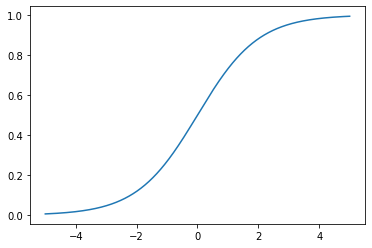

In [29]:
plt.plot(x,y)
plt.annotate()